In [53]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import read_player_stats
import training_data
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 1000

In [41]:
#read in rb data for all seasons
total_df = training_data.make_total_data(seasons=range(2004,2015), pages=[0,1,2,3])
#training samples
train_df = training_data.make_training_df(total_df, seasons=range(2004,2013), ppg=True)

In [42]:
#train on points per game
X_train = np.array(train_df.drop(['Name','FFPPG'], axis=1))
y_train = np.array(train_df['FFPPG'])

model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [43]:
eval_df = training_data.make_training_df(total_df, seasons=range(2012,2015), ppg=True)
X_eval = np.array(eval_df.drop(['Name','FFPPG'], axis=1))

y_eval = model.predict(X_eval) #predict 2014 stats

In [44]:
#compare
pred_summary = eval_df[['Name']]
pred_summary['Predicted'] = y_eval
actual = total_df[total_df.Season == 2014]
actual = actual[['Name','FFPPG']]
pred_summary = pd.merge(pred_summary, actual, on='Name', how='inner')

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [45]:
pred_summary

,Name,Predicted,FFPPG
0,AdrianPeterson,11.732840,9.3
1,AhmadBradshaw,8.646467,12.1
2,AlfonsoSmith,3.113000,1.0
3,AlfredMorris,9.061000,10.7
4,AnthonyDixon,3.096000,4.6
5,AnthonySherman,0.715600,1.3
6,AntoneSmith,3.854533,6.7
7,ArianFoster,8.952253,18.1
8,BenTate,7.135400,6.1
9,BernardPierce,6.552353,3.8


In [60]:
pred_summary['Error'] =  pred_summary['FFPPG'] - pred_summary['Predicted']

In [69]:
ordered_pred = pred_summary.sort(columns='Error', ascending=False)
ordered_pred.set_index('Name', inplace=True)

In [73]:
top10 = ordered_pred[:10]
bottom10 = ordered_pred[-10:]

In [74]:
bottom10

,Predicted,FFPPG,Error
Name,,,
MarcelReece,6.100540,2.7,-3.400540
CJSpiller,8.889800,5.4,-3.489800
LeSeanMcCoy,14.853200,11.1,-3.753200
BrandonBolden,6.024200,1.7,-4.324200
ChrisJohnson,10.286600,5.8,-4.486600
DannyWoodhead,7.628100,2.4,-5.228100
KnowshonMoreno,12.457867,7.2,-5.257867
ReggieBush,11.456200,6.1,-5.356200
MauriceJonesDrew,6.894600,1.5,-5.394600


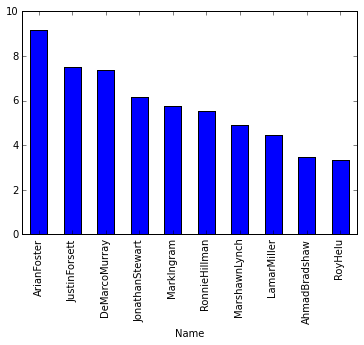

In [80]:
top10['Error'].plot(kind='bar')

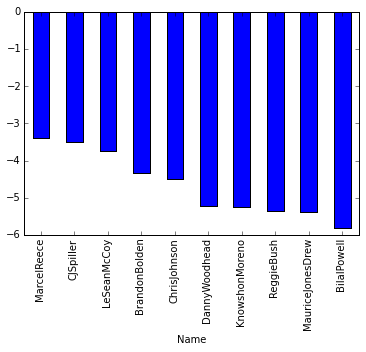

In [79]:
bottom10['Error'].plot(kind='bar')

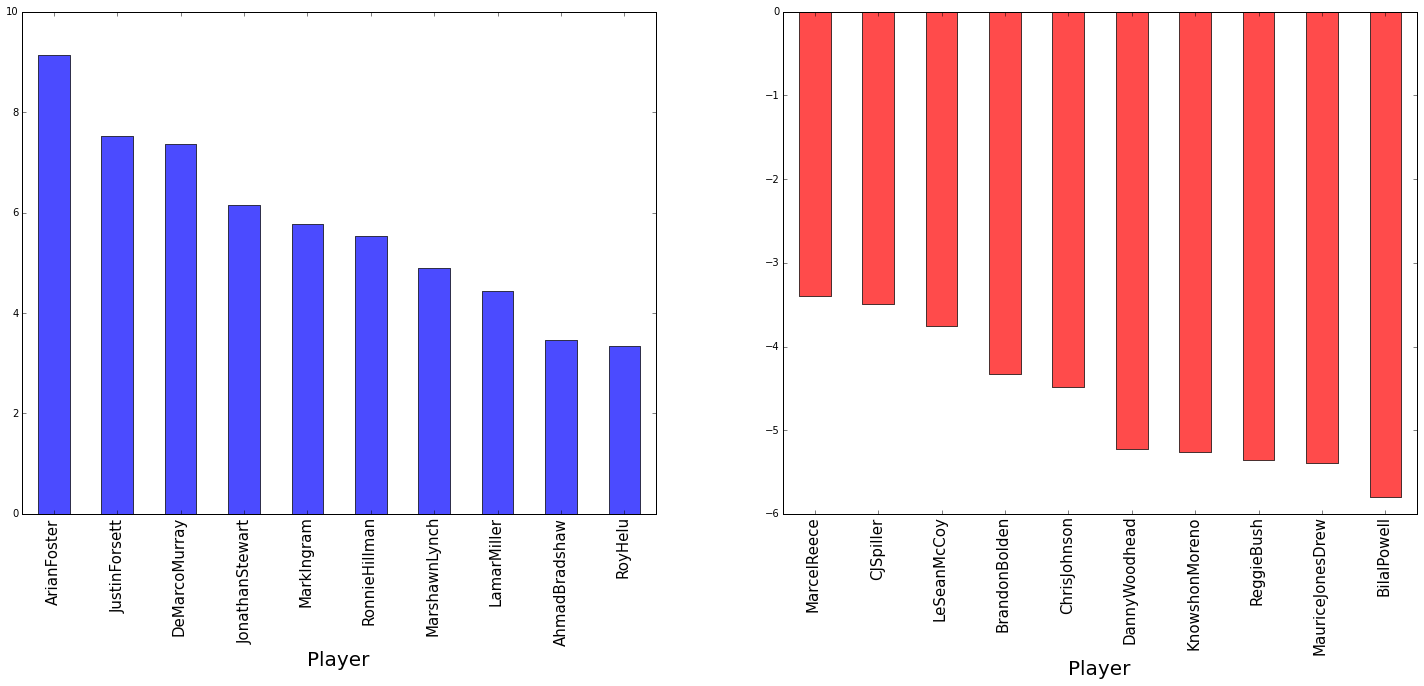

In [119]:
fig = plt.figure(figsize=(25,9))
p1 = fig.add_subplot(1,2,1)
p1.tick_params(axis='x', labelsize=15)
top10['Error'].plot(kind='bar', alpha=.7)
plt.xlabel('Player', fontsize=20)
p2 = fig.add_subplot(1,2,2)
p2.tick_params(axis='x', labelsize=15)
bottom10['Error'].plot(kind='bar', color='r', alpha=.7)
plt.xlabel('Player', fontsize=20)